In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset
td = pd.read_csv("titanic.csv")

In [3]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Step 2: Data Cleaning
# a. Handling Missing Values
missing_data = td.isnull().sum()
print(missing_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:

# Deal with missing values in 'Age', 'Cabin', and 'Embarked'
td['Age'].fillna(td['Age'].median(), inplace=True)
td['Cabin'].fillna('Unknown', inplace=True)
td['Embarked'].fillna(td['Embarked'].mode()[0], inplace=True)

In [6]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [7]:
# b. Removing Unnecessary Columns
td.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


In [8]:
# c. Data Type Conversion
td['Sex'] = td['Sex'].map({'male': 0, 'female': 1})
td['Embarked'] = td['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [9]:
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,Unknown,0
1,1,1,1,38.0,1,0,71.2833,C85,1
2,1,3,1,26.0,0,0,7.9250,Unknown,0
3,1,1,1,35.0,1,0,53.1000,C123,0
4,0,3,0,35.0,0,0,8.0500,Unknown,0


In [10]:

# Step 3: Exploratory Data Analysis (EDA)
# a. Summary Statistics
summary_stats = td.describe()
print(summary_stats)

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    0.361392  
std     49.693429    0.635673  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329

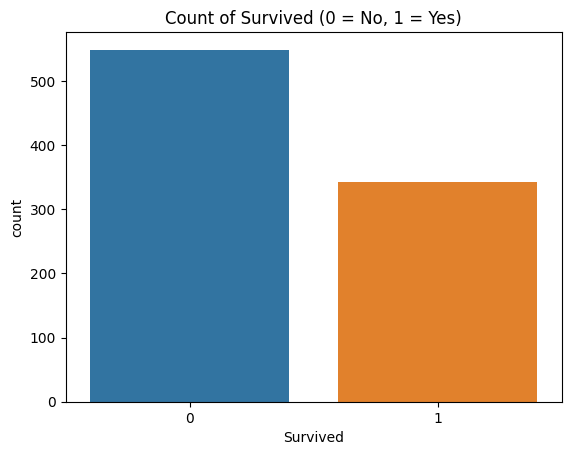

In [11]:
# b. Data Visualization
# Let's create some visualizations to explore relationships and patterns.

# Countplot of Survived
sns.countplot(x='Survived', data=td)
plt.title('Count of Survived (0 = No, 1 = Yes)')
plt.show()

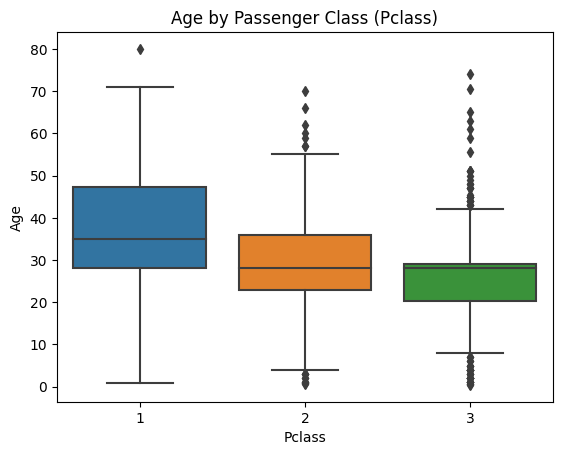

In [12]:


# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=td)
plt.title('Age by Passenger Class (Pclass)')
plt.show()

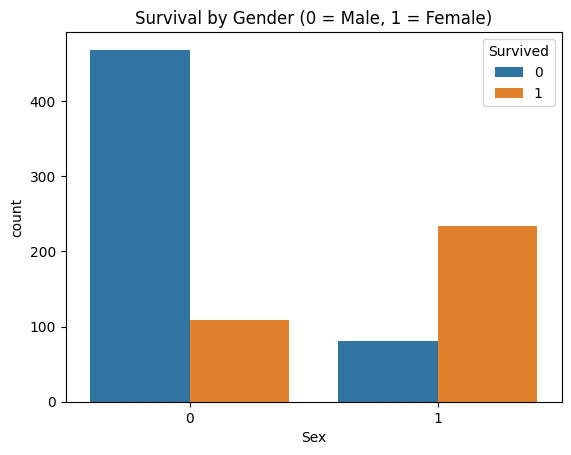

In [13]:

# Countplot of Survived by Sex
sns.countplot(x='Sex', hue='Survived', data=td)
plt.title('Survival by Gender (0 = Male, 1 = Female)')
plt.show()

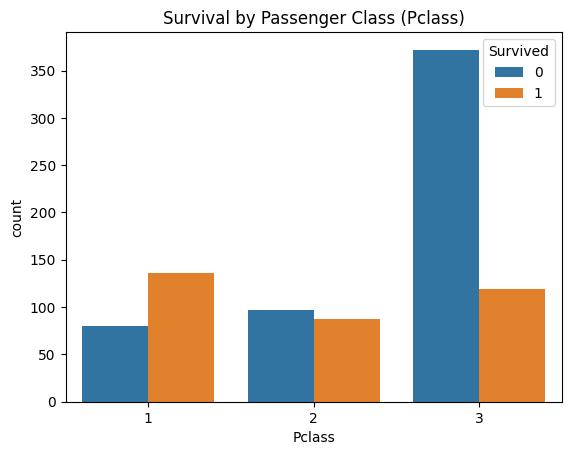

In [14]:
# Countplot of Survived by Pclass
sns.countplot(x='Pclass', hue='Survived', data=td)
plt.title('Survival by Passenger Class (Pclass)')
plt.show()